In [1]:
import pandas as pd
import numpy as np
from scipy import stats

import matplotlib.pyplot as plt
from matplotlib import cm
import matplotlib.axes as ax
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

import wrangle

import warnings
warnings.filterwarnings("ignore")

np.set_printoptions(suppress=True)

/usr/local/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
df = wrangle.acquire_game_sales()

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
2,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
3,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
4,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33


In [4]:
df = wrangle.clean_game_sales(df)

In [5]:
df.head()

,Year,Genre,Global_Sales,years_binned,sales_binned,Nintendo,Playstation,Xbox,Computer,Sega,Other,Action_Adventure,Simulation,Sports,Misc,Role_Playing,Shooter,Strategy
Rank,,,,,,,,,,,,,,,,,,
1,2006,Sports,82.74,05-10,Over 10 Million,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1985,Platform,40.24,80-85,Over 10 Million,0,1,0,0,0,0,0,0,1,0,0,0,0
3,2008,Simulation,35.82,05-10,Over 10 Million,0,1,0,0,0,0,0,0,0,0,0,1,0
4,2009,Sports,33.00,05-10,Over 10 Million,0,1,0,0,0,0,0,0,0,0,0,0,1
5,1996,Role_Playing,31.37,95-00's,Over 10 Million,0,1,0,0,0,0,0,0,0,1,0,0,0


In [6]:
train, validate, test = wrangle.split_game_sales(df)

In [7]:
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test)

In [8]:
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16327 entries, 1 to 16600
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Year              16327 non-null  int64   
 1   Genre             16327 non-null  object  
 2   Global_Sales      16327 non-null  float64 
 3   years_binned      16318 non-null  category
 4   sales_binned      16327 non-null  category
 5   Nintendo          16327 non-null  uint8   
 6   Playstation       16327 non-null  uint8   
 7   Xbox              16327 non-null  uint8   
 8   Computer          16327 non-null  uint8   
 9   Sega              16327 non-null  uint8   
 10  Other             16327 non-null  uint8   
 11  Action_Adventure  16327 non-null  uint8   
 12  Simulation        16327 non-null  uint8   
 13  Sports            16327 non-null  uint8   
 14  Misc              16327 non-null  uint8   
 15  Role_Playing      16327 non-null  uint8   
 16  Shooter           16327 non

# Correlation Heatmap

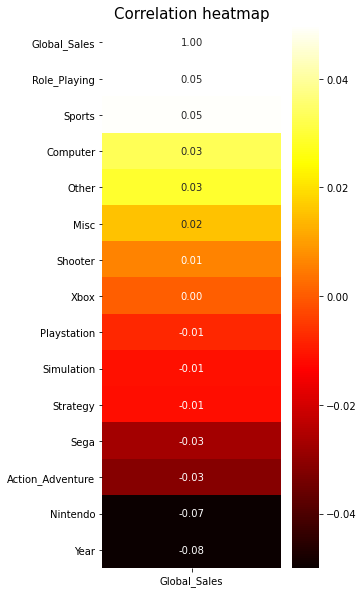

In [10]:
# Correlation heatmap
corr = pd.DataFrame(train.corr()['Global_Sales'].sort_values(ascending = False))
plt.figure(figsize = (4,10))
sns.heatmap(corr, annot = True, fmt = '.2f', vmin = -0.05, 
            vmax = 0.05, cmap = 'hot')
plt.title('Correlation heatmap', fontsize = 15)
plt.show()

## Takeaways:
- There is not a lot of features that are directly correlated to the Global Sales of games
- Strongest are:
    - Year of realease with a correlation of -0.08
    - Nintendo Platform with a correlation of -0.07

# Visualize Distribution of GLobal Sales

<AxesSubplot:title={'center':'Global Sales Boxen Plot'}, xlabel='Global_Sales'>

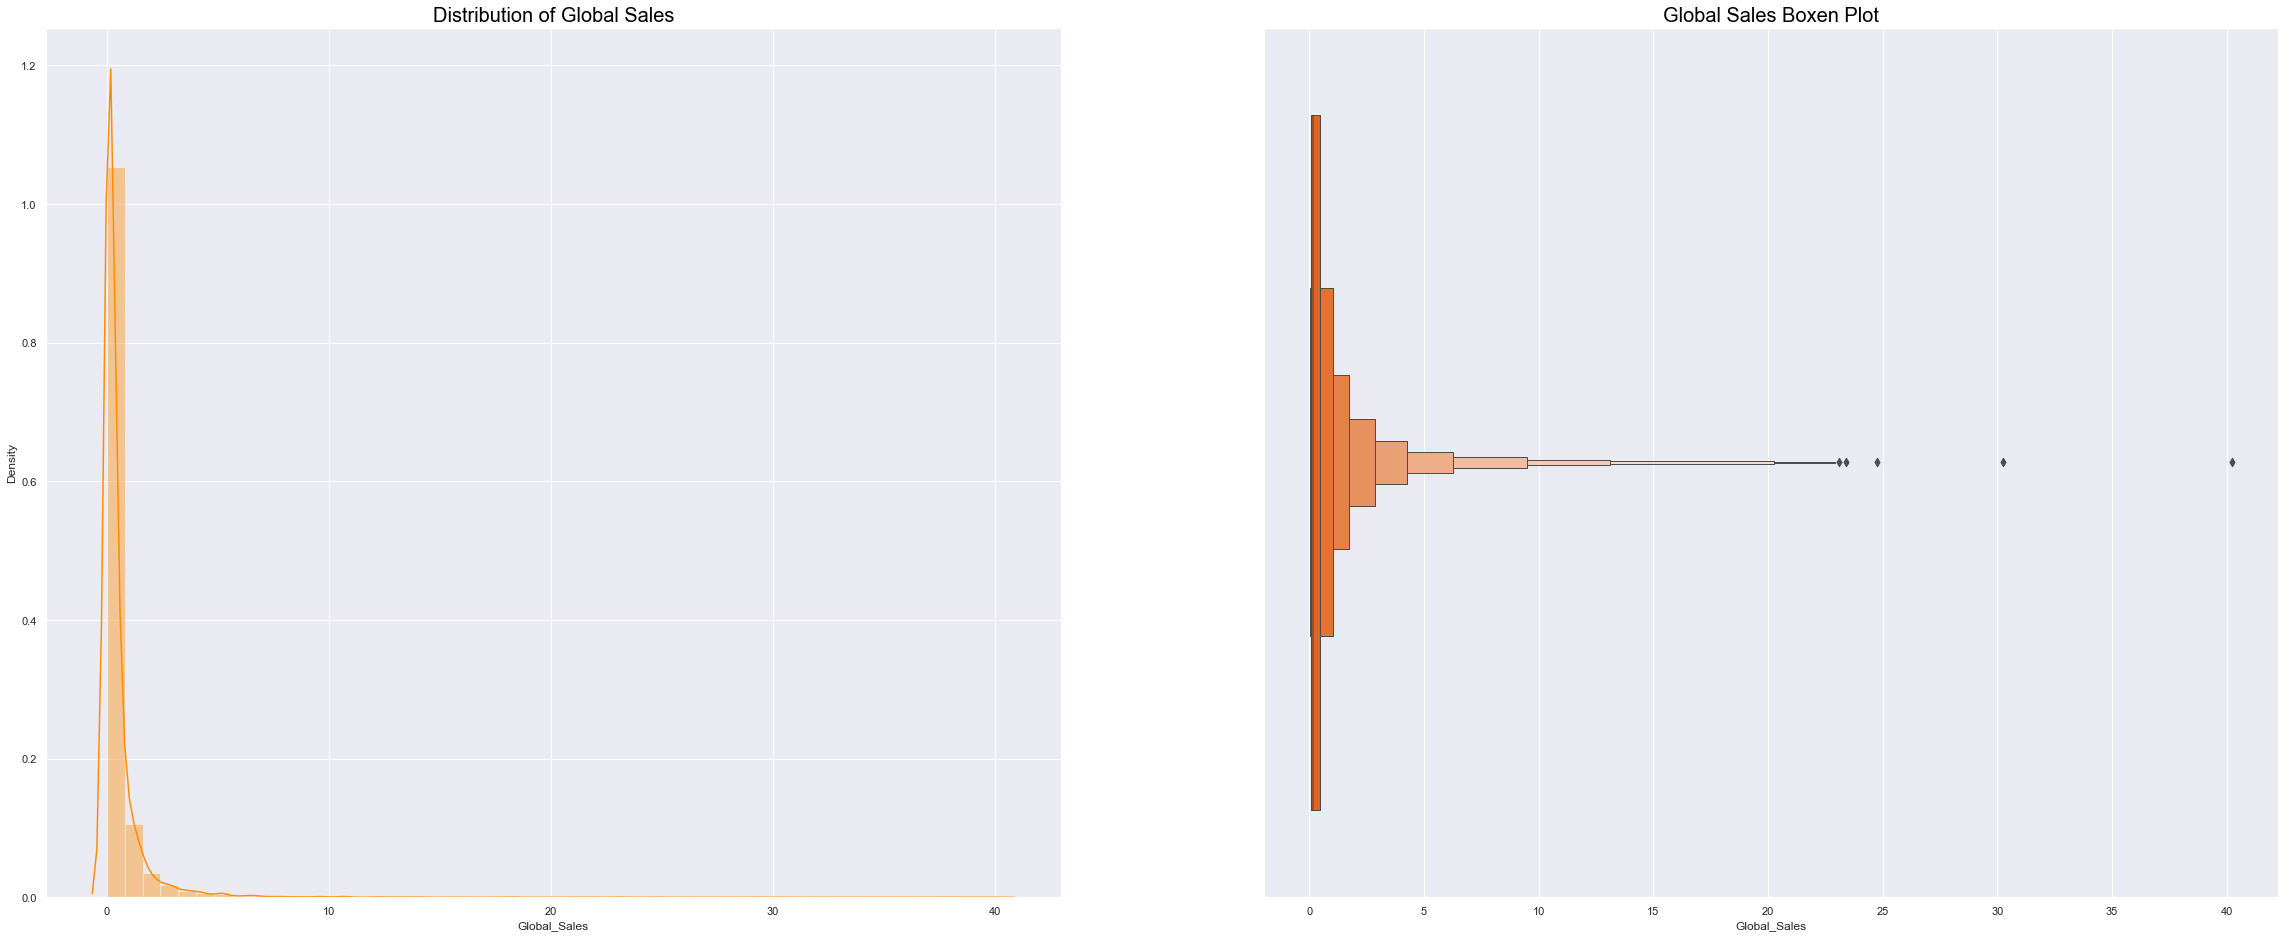

In [11]:
plt.subplots(1, 2, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(1,2,1)
plt.title("Distribution of Global Sales", size=20, color='black')
sns.distplot(train.Global_Sales, kde=True, color='darkorange')

plt.subplot(1,2,2)
plt.title("Global Sales Boxen Plot", size=20, color='black')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxenplot(x=train["Global_Sales"], palette='hot')

In [12]:
df.sales_binned.value_counts()

100k               6072
100k-200k          2879
1 Mil - 10 Mil     1970
200k-300k          1640
300k-400k          1022
400k-500k           819
500k-600k           607
600k-700k           425
700k-800k           337
800k-900k           261
900-1 Million       233
Over 10 Million      62
Name: sales_binned, dtype: int64

## Takeaways:
- skewed right
- far more sales of 100K
    - nearly doubled in the amount of games titles than the second highest.

# Visualize Percents of the Sales Bins per Platforms

<AxesSubplot:title={'center':'Percent of Sales for All Other Platforms'}, xlabel='sales_binned', ylabel='Other'>

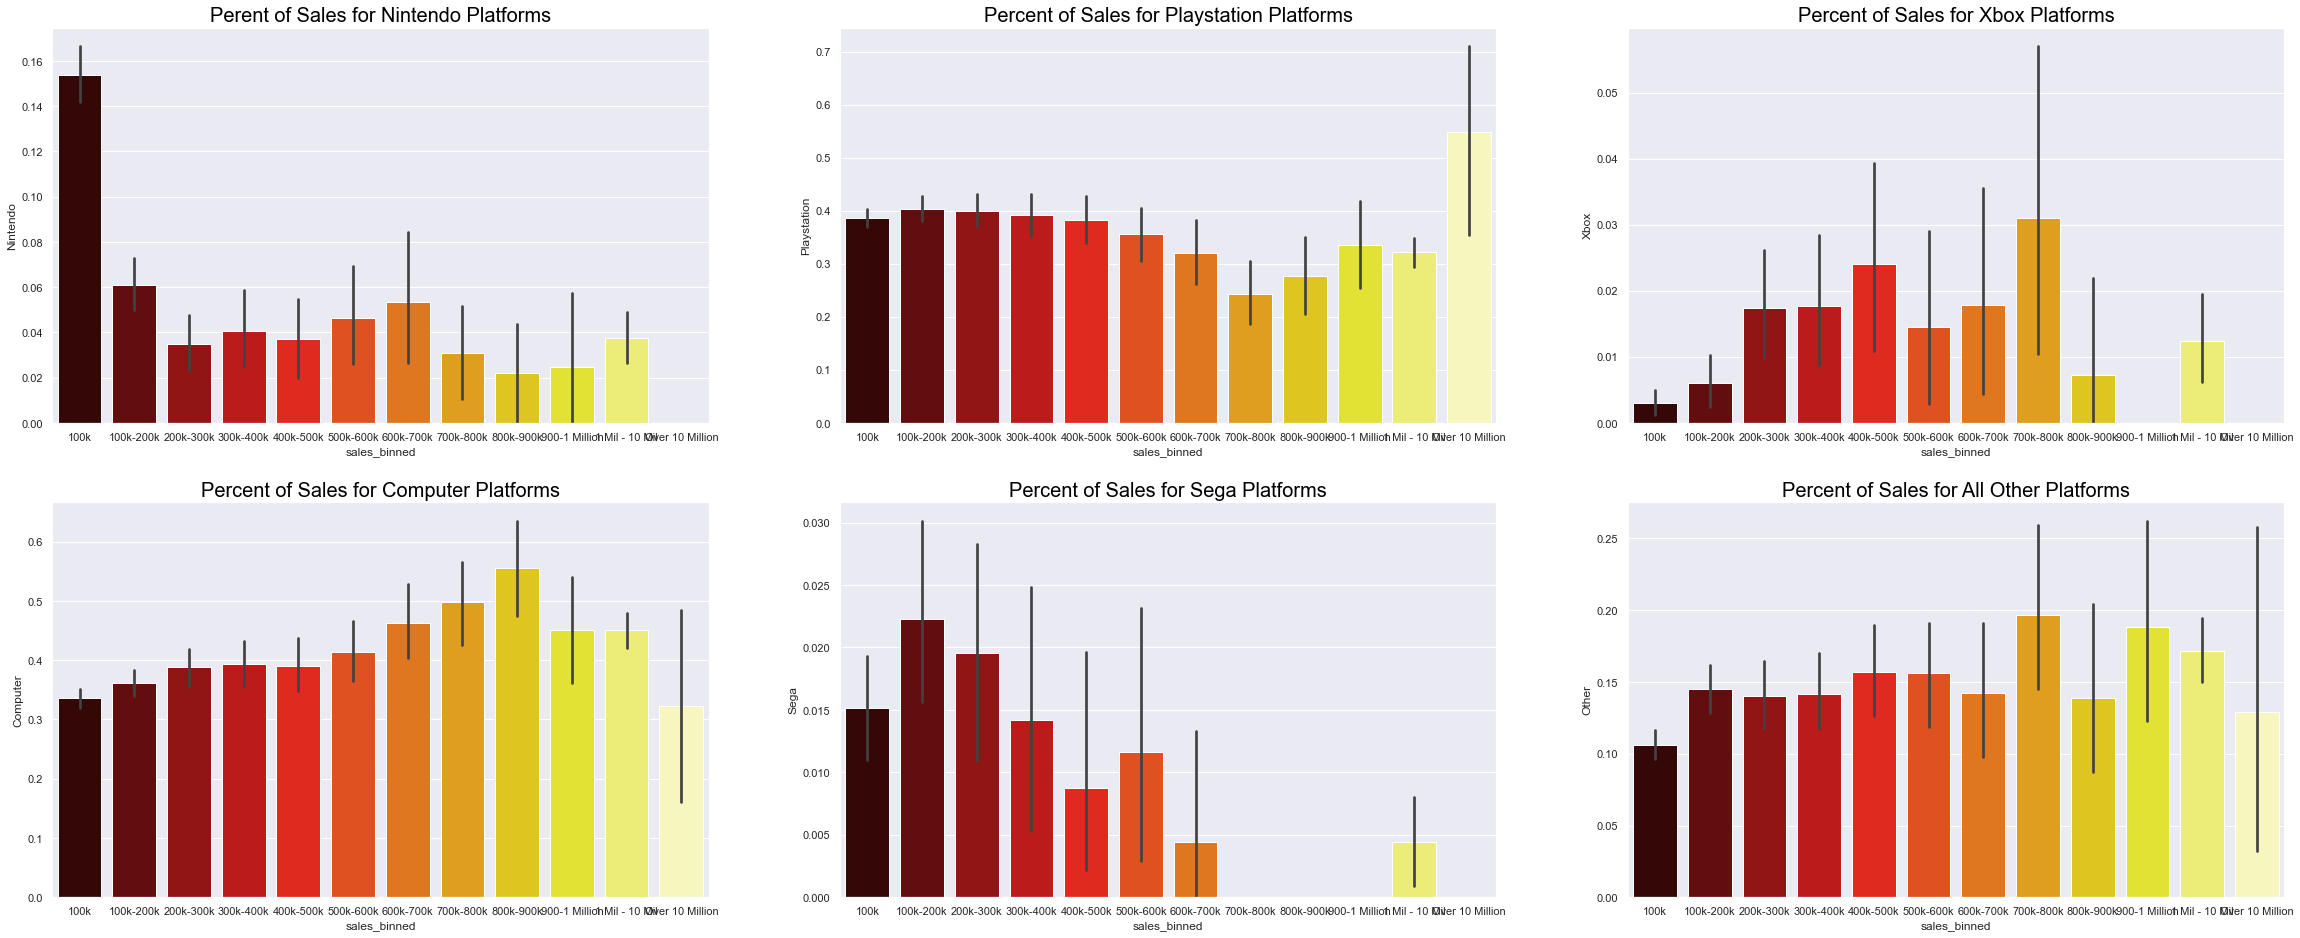

In [13]:
plt.subplots(2, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,3,1)
plt.title("Perent of Sales for Nintendo Platforms", size=20, color='black')
sns.barplot(y='Nintendo', x='sales_binned', data=train,
               palette='hot')

plt.subplot(2,3,2)
plt.title("Percent of Sales for Playstation Platforms", size=20, color='black')
sns.barplot(y='Playstation', x='sales_binned', data=train,
               palette='hot')

plt.subplot(2,3,3)
plt.title("Percent of Sales for Xbox Platforms", size=20, color='black')
sns.barplot(y='Xbox', x='sales_binned', data=train,
               palette='hot')

plt.subplot(2,3,4)
plt.title("Percent of Sales for Computer Platforms", size=20, color='black')
sns.barplot(y='Computer', x='sales_binned', data=train,
               palette='hot')

plt.subplot(2,3,5)
plt.title("Percent of Sales for Sega Platforms", size=20, color='black')
sns.barplot(y='Sega', x='sales_binned', data=train,
               palette='hot')

plt.subplot(2,3,6)
plt.title("Percent of Sales for All Other Platforms", size=20, color='black')
sns.barplot(y='Other', x='sales_binned', data=train,
               palette='hot')

## Takeaways:
- These are showing the percentage of Sales across each platform type.
- Nintendo usually sells between 0 to 100 thousand copies by a significant margin.
    - Their 100k sales bin is about 15.4% of all 100k copy saleswith its next highest being 100-200k at about 6% of those overall sales.
- Playstations highest sale numbers ar usually over 10 million coppies sold. Their sales in this bin takes up about 56% of this bin.
- Xbox Platforms have a pretty steady amount of copies sold ranging evenly between 200 and 800 thousand copies sold.
    - Their most consistent would be 700 thousand to 800 thousand. The xbox sale sin this range take up about 3.2% of this overall bin sales
- Computer Platforms have a pretty steady amount of copies sold in all amounts.
    - ranges from the smallest (being over 10million at ~ 32% of this bin) and the largest (being 800-900k copies sold taking up ~56% of the total 800-900k sales)
- Sega platforms skew more towards lower sales than higheer sales.
    - Their highest performing is between 100-200 thousand copies sold.
        - ~2.3% of this bin is sold by Sega
- all other platfroms perform very evenl;y thorugh all amount of copies sold


# Visualize Number Of Game Titles in each Sales Bin

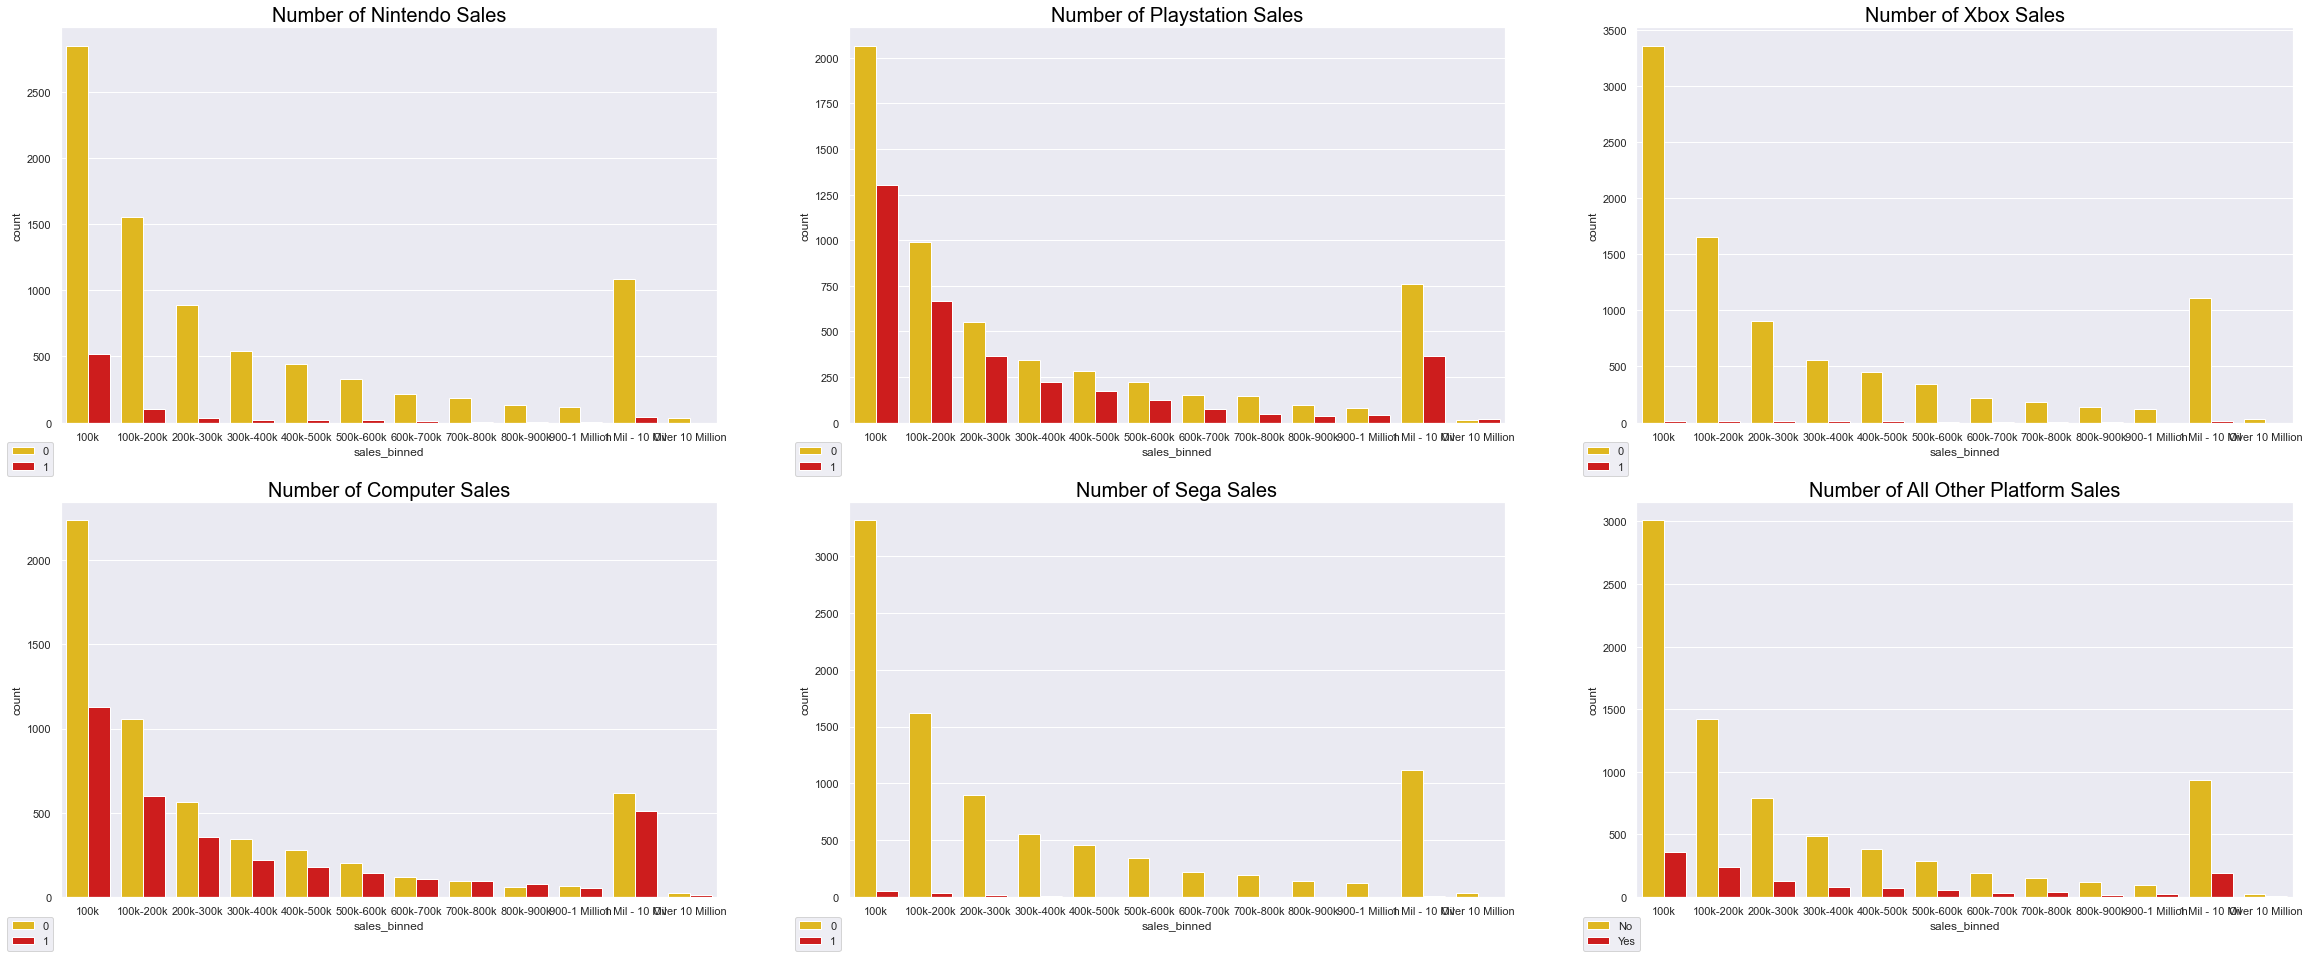

In [14]:
plt.subplots(2, 3, figsize=(40,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,3,1)
plt.title("Number of Nintendo Sales", size=20, color='black')
sns.countplot(x='sales_binned', hue='Nintendo', data=train,
               palette='hot_r')
plt.legend(bbox_to_anchor=(-0.09, -0.15), loc='lower left')

plt.subplot(2,3,2)
plt.title("Number of Playstation Sales", size=20, color='black')
sns.countplot(x='sales_binned', hue='Playstation', data=train,
               palette='hot_r')
plt.legend(bbox_to_anchor=(-0.09, -0.15), loc='lower left')

plt.subplot(2,3,3)
plt.title("Number of Xbox Sales", size=20, color='black')
sns.countplot(x='sales_binned', hue='Xbox', data=train,
               palette='hot_r')
plt.legend(bbox_to_anchor=(-0.09, -0.15), loc='lower left')

plt.subplot(2,3,4)
plt.title("Number of Computer Sales", size=20, color='black')
sns.countplot(x='sales_binned', hue='Computer', data=train,
               palette='hot_r')
plt.legend(bbox_to_anchor=(-0.09, -0.15), loc='lower left')

plt.subplot(2,3,5)
plt.title("Number of Sega Sales", size=20, color='black')
sns.countplot(x='sales_binned', hue='Sega', data=train,
               palette='hot_r')
plt.legend(bbox_to_anchor=(-0.09, -0.15), loc='lower left')

plt.subplot(2,3,6)
plt.title("Number of All Other Platform Sales", size=20, color='black')
sns.countplot(x='sales_binned', hue='Other', data=train,
               palette='hot_r')


leg = plt.legend(bbox_to_anchor=(-0.09, -0.15), loc='lower left')
labs = leg.texts
labs[0].set_text("No")
labs[1].set_text("Yes")


## Takeaways:
- Amount of individual titles made within each bin of number of coppies sold.

|Platfrom|0-100k|100k-200k|200k-300k|300k-400k|400k-500k|500k-600k|600k-700k|700k-800k|800k-900k|900-1 Million|1 Mil - 10 Mil|Over 10 Million|
|-----|-------|------|-----|-------|------|-----|-------|------|-----|-------|------|------|  
|Nintendo|909 titles|165 titles|63 titles|39 titles|35 titles|21 titles|18 titles|14 titles|5 titles|11 titles|75 titles|0 titles| 
|Playstation|2350 titles|1165 titles|660 titles|382 titles|308 titles|203 titles|145 titles|104 titles|81 titles|75 titles|664 titles|38 titles| 
|Xbox|14 titles|15 titles|23 titles|21 titles|16 titles|8 titles|7 titles|9 titles|2 titles|2 titles|23 titles|0 titles|  
|Computer|2036 titles|1034 titles|621 titles|424 titles|326 titles|270 titles|180 titles|148 titles|130 titles|98 titles|871 titles|15 titles|  
|Sega|102 titles|66 titles|31 titles|16 titles|9 titles|7 titles|2 titles|0 titles|0 titles|0 titles|20 titles|0 titles| 
|Other|661 titles|434 titles|242 titles|140 titles|125 titles|98 titles|73 titles|62 titles|43 titles|47 titles|317 titles|9 titles|  

# Visualize Percents of the Sales Bins per Genre

<AxesSubplot:title={'center':'Percent of Sales for All Other Game Types'}, xlabel='sales_binned', ylabel='Misc'>

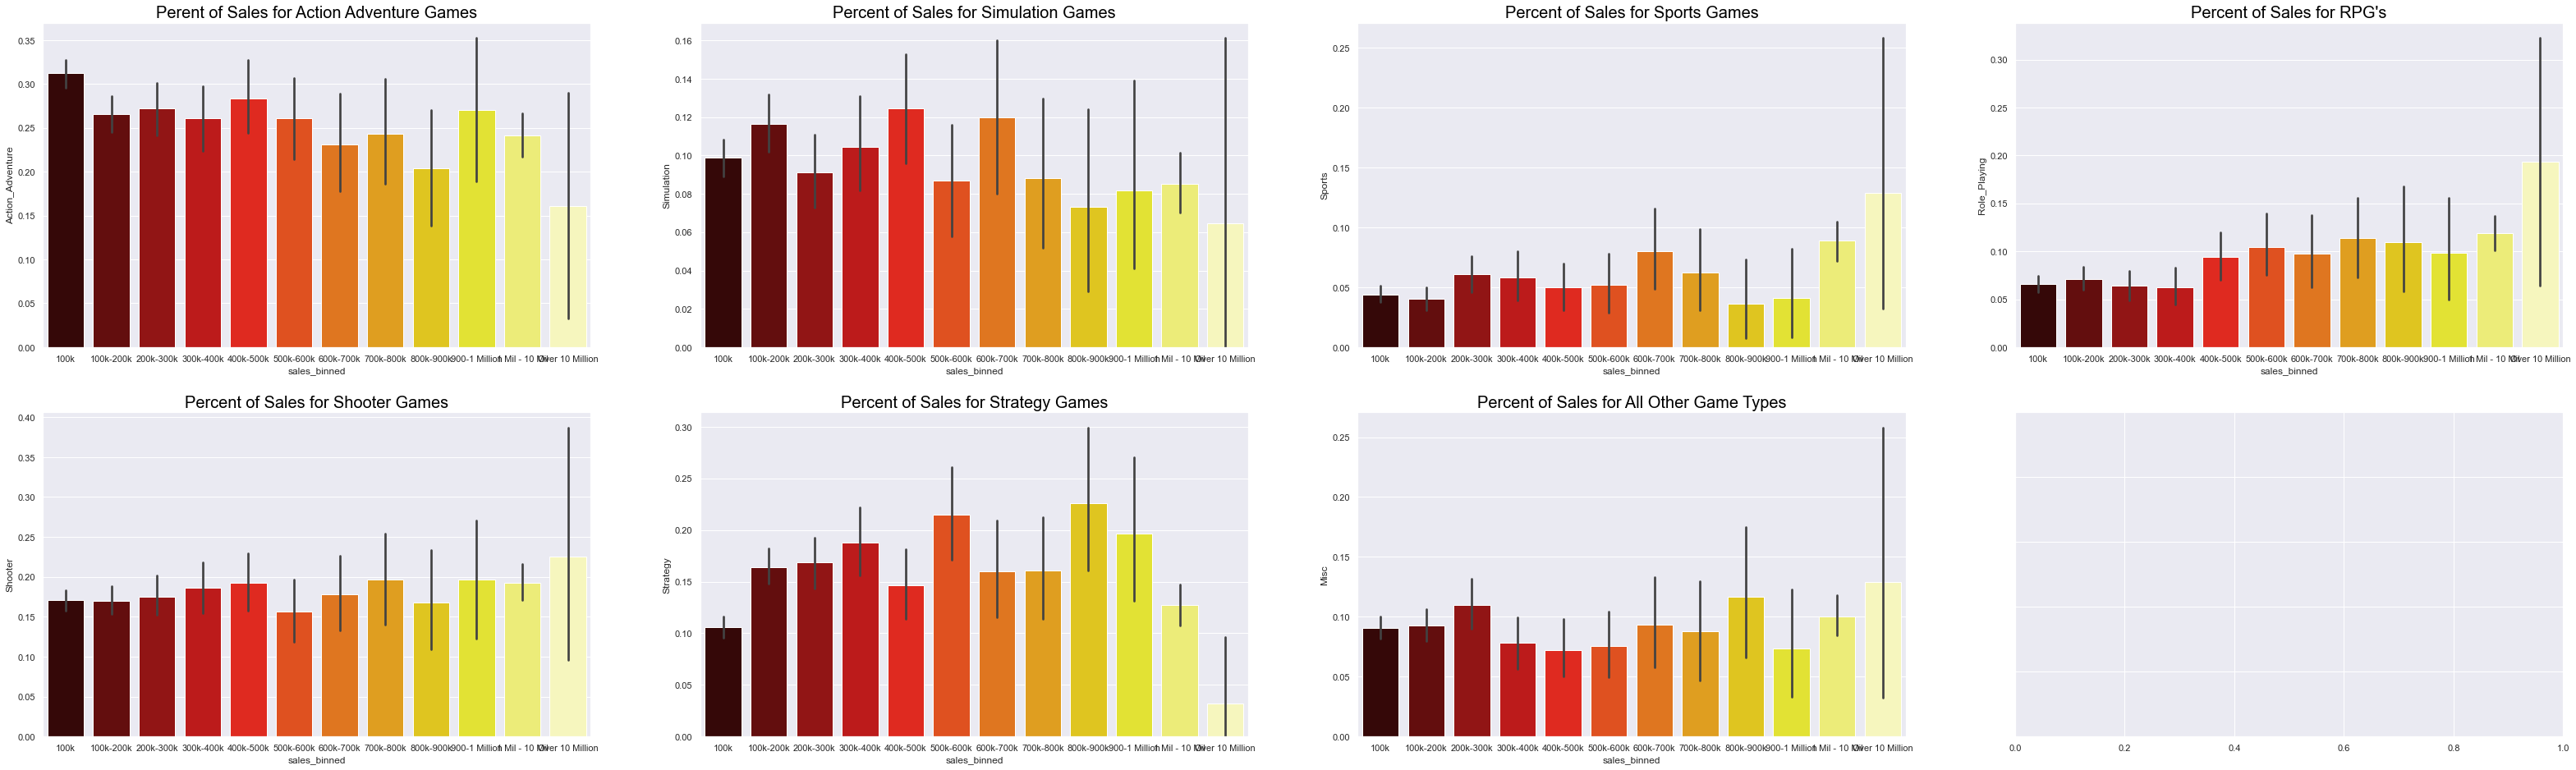

In [15]:
plt.subplots(2, 4, figsize=(55,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,4,1)
plt.title("Perent of Sales for Action Adventure Games", size=20, color='black')
sns.barplot(y='Action_Adventure', x='sales_binned', data=train,
               palette='hot')

plt.subplot(2,4,2)
plt.title("Percent of Sales for Simulation Games", size=20, color='black')
sns.barplot(y='Simulation', x='sales_binned', data=train,
               palette='hot')

plt.subplot(2,4,3)
plt.title("Percent of Sales for Sports Games", size=20, color='black')
sns.barplot(y='Sports', x='sales_binned', data=train,
               palette='hot')

plt.subplot(2,4,4)
plt.title("Percent of Sales for RPG's", size=20, color='black')
sns.barplot(y='Role_Playing', x='sales_binned', data=train,
               palette='hot')

plt.subplot(2,4,5)
plt.title("Percent of Sales for Shooter Games", size=20, color='black')
sns.barplot(y='Shooter', x='sales_binned', data=train,
               palette='hot')

plt.subplot(2,4,6)
plt.title("Percent of Sales for Strategy Games", size=20, color='black')
sns.barplot(y='Strategy', x='sales_binned', data=train,
               palette='hot')

plt.subplot(2,4,7)
plt.title("Percent of Sales for All Other Game Types", size=20, color='black')
sns.barplot(y='Misc', x='sales_binned', data=train,
               palette='hot')

## Takeaways:
- Action Adventure Games have the highest percentage of game sales across all number of copies sold bins
    - Ranging from ~24% to ~55%
- Sport games and RPG's both tend to be on the low end of sale percents, but both have a spike when selling over 10 million copies.
- The Biggest sellers when it comes to genre are Action Adventure, Strategy, and Shooters.

# Visualize Number Of Game Genre's in each Sales Bin

<AxesSubplot:title={'center':'Number of All Other Genre Sales'}, xlabel='sales_binned', ylabel='count'>

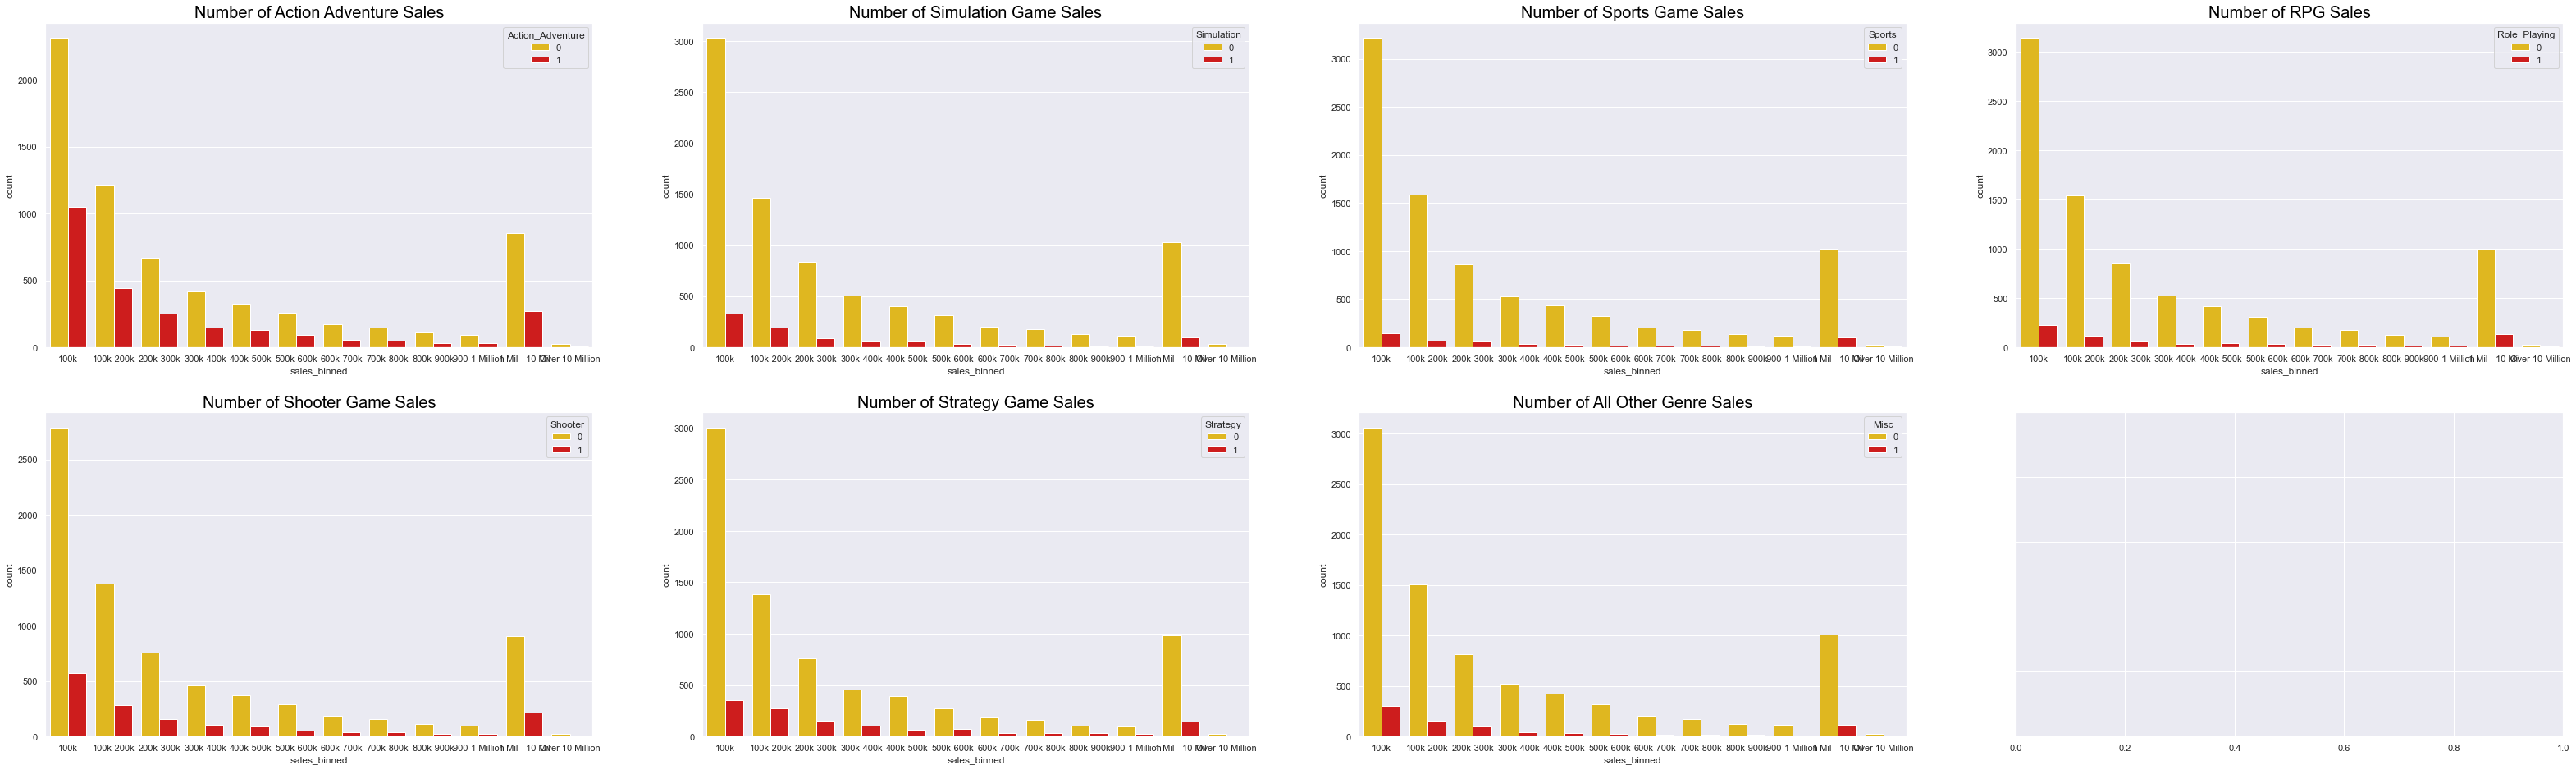

In [16]:
plt.subplots(2, 4, figsize=(55,16), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,4,1)
plt.title("Number of Action Adventure Sales", size=20, color='black')
sns.countplot(x='sales_binned', hue='Action_Adventure', data=train,
               palette='hot_r')

plt.subplot(2,4,2)
plt.title("Number of Simulation Game Sales", size=20, color='black')
sns.countplot(x='sales_binned', hue='Simulation', data=train,
               palette='hot_r')

plt.subplot(2,4,3)
plt.title("Number of Sports Game Sales", size=20, color='black')
sns.countplot(x='sales_binned', hue='Sports', data=train,
               palette='hot_r')

plt.subplot(2,4,4)
plt.title("Number of RPG Sales", size=20, color='black')
sns.countplot(x='sales_binned', hue='Role_Playing', data=train,
               palette='hot_r')

plt.subplot(2,4,5)
plt.title("Number of Shooter Game Sales", size=20, color='black')
sns.countplot(x='sales_binned', hue='Shooter', data=train,
               palette='hot_r')

plt.subplot(2,4,6)
plt.title("Number of Strategy Game Sales", size=20, color='black')
sns.countplot(x='sales_binned', hue='Strategy', data=train,
               palette='hot_r')

plt.subplot(2,4,7)
plt.title("Number of All Other Genre Sales", size=20, color='black')
sns.countplot(x='sales_binned', hue='Misc', data=train,
               palette='hot_r')

## Takeaways:
- There are far many Action Adventure games made than any other.
- Action Adventure games make up for 29.78% of games (4,479 individual game titles)
- Strategy is the second highest with 2,304 games which is 19.27% of games.
- The lowest produced game type that sold a minimum of 100 thousand copies is Sports with only 876 game titles.

|Genre|0-100k|100k-200k|200k-300k|300k-400k|400k-500k|500k-600k|600k-700k|700k-800k|800k-900k|900-1 Million|1 Mil - 10 Mil|Over 10 Million|Total|
|-----|-------|------|-----|-------|------|-----|-------|------|-----|-------|------|------|------| 
|Action Adventure|1929 titles|772 titles|440 titles|267 titles|229 titles|149 titles|102 titles|76 titles|54 titles|56 titles|445 titles|10 titles|4,479|
|Simulation|654 titles|336 titles|187 titles|103 titles|92 titles|54 titles|47 titles|26 titles|24 titles|23 titles|160 titles|4 titles|1,710|
|Sports|245 titles|137 titles|82 titles|58 titles|46 titles|35 titles|35 titles|18 titles|13 titles|13 titles|183 titles|11 titles|876|
|RPG|403 titles|208 titles|97 titles|65 titles|80 titles|51 titles|45 titles|38 titles|27 titles|23 titles|233 titles|12 titles|1,285|
|Shooter|1032 titles|496 titles|306 titles|199 titles|155 titles|100 titles|70 titles|73 titles|46 titles|44 titles|382 titles|10 titles|2,913|
|Strategy|641 titles|455 titles|266 titles|179 titles|125 titles|119 titles|67 titles|57 titles|55 titles|45 titles|291 titles|4 titles|2,304|
|Misc|527 titles|259 titles|167 titles|82 titles|60 titles|54 titles|40 titles|32 titles|26 titles|23 titles|192 titles|9 titles|1,471|